In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from matplotlib import cm
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

# Load the dataset from the Excel file
df = pd.read_csv("/content/drive/MyDrive/US_youtube_trending_data_2023.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39198 entries, 0 to 39197
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           39198 non-null  object
 1   title              39198 non-null  object
 2   publishedAt        39198 non-null  object
 3   channelId          39198 non-null  object
 4   channelTitle       39198 non-null  object
 5   categoryId         39198 non-null  int64 
 6   trending_date      39198 non-null  object
 7   tags               39198 non-null  object
 8   view_count         39198 non-null  int64 
 9   likes              39198 non-null  int64 
 10  comment_count      39198 non-null  int64 
 11  comments_disabled  39198 non-null  bool  
 12  ratings_disabled   39198 non-null  bool  
 13  description        38876 non-null  object
dtypes: bool(2), int64(4), object(8)
memory usage: 3.7+ MB


In [3]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,comments_disabled,ratings_disabled,description
0,WFBVYRy962k,YoungBoy Never Broke Again - Black ( Official ...,2023-01-06T05:39:02Z,UClW4jraMKz6Qj69lJf-tODA,YoungBoy Never Broke Again,10,2023-01-07T00:00:00Z,YoungBoy Never Broke Again|NBA YoungBoy|YoungB...,1074119,88913,6886,False,False,(I Rest My Case OUT NOW: https://NeverBrokeAga...
1,_uS8QRe2qfE,Quavo - WITHOUT YOU,2023-01-05T03:30:06Z,UCU_xT0uVi5cku7cg9hDgkMA,Quavo Huncho,10,2023-01-07T00:00:00Z,Quavo|Takeoff|Migos|Offset|Infinity Links|Tako...,3992984,397467,31191,False,False,♾🚀Listen to WITHOUT YOU here: https://soundclo...
2,NigrQ9UcJy4,I Strapped A GoPro To A Fish!,2023-01-05T21:01:33Z,UCUaT_39o1x6qWjz7K2pWcgw,Beast Reacts,24,2023-01-07T00:00:00Z,life hacks|crafts|slime|do it yourself|diy|lif...,4150077,166056,4416,False,False,SUBSCRIBE OR YOU'LL HAVE BAD LUCKCHECK OUT THE...
3,uhPPttviktc,"FLETCHER, Kelsea Ballerini - Better Version",2023-01-06T15:00:29Z,UCTmZfy45GeNUXiuUsNpnOXg,FLETCHERVEVO,10,2023-01-07T00:00:00Z,fletcher|fletcher live|fletcher 2022|fletcher ...,243840,15312,717,False,False,‘Starring Ava Capri and Gavin Leatherwood’Stre...
4,kEnh_5z4I7w,I'M PRINCESS PROTECTION PROGRAM,2023-01-05T17:00:21Z,UCSUf5_EPEfl4zlBKZHkZdmw,Danny Gonzalez,23,2023-01-07T00:00:00Z,danny gonzalez|funny|commentary|comedy|react|r...,1691397,137762,6485,False,False,edited by Jake Mayer https://www.instagram.com...


In [4]:
df.isnull().sum()

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
view_count             0
likes                  0
comment_count          0
comments_disabled      0
ratings_disabled       0
description          322
dtype: int64

In [5]:
from datetime import datetime

df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['time_to_trend_min'] = (df['trending_date'] - df['publishedAt']).dt.total_seconds() / 60
df['time_to_trend_min'] = df['time_to_trend_min'].round().astype(int)

df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,comments_disabled,ratings_disabled,description,time_to_trend_min
0,WFBVYRy962k,YoungBoy Never Broke Again - Black ( Official ...,2023-01-06 05:39:02+00:00,UClW4jraMKz6Qj69lJf-tODA,YoungBoy Never Broke Again,10,2023-01-07 00:00:00+00:00,YoungBoy Never Broke Again|NBA YoungBoy|YoungB...,1074119,88913,6886,False,False,(I Rest My Case OUT NOW: https://NeverBrokeAga...,1101
1,_uS8QRe2qfE,Quavo - WITHOUT YOU,2023-01-05 03:30:06+00:00,UCU_xT0uVi5cku7cg9hDgkMA,Quavo Huncho,10,2023-01-07 00:00:00+00:00,Quavo|Takeoff|Migos|Offset|Infinity Links|Tako...,3992984,397467,31191,False,False,♾🚀Listen to WITHOUT YOU here: https://soundclo...,2670
2,NigrQ9UcJy4,I Strapped A GoPro To A Fish!,2023-01-05 21:01:33+00:00,UCUaT_39o1x6qWjz7K2pWcgw,Beast Reacts,24,2023-01-07 00:00:00+00:00,life hacks|crafts|slime|do it yourself|diy|lif...,4150077,166056,4416,False,False,SUBSCRIBE OR YOU'LL HAVE BAD LUCKCHECK OUT THE...,1618
3,uhPPttviktc,"FLETCHER, Kelsea Ballerini - Better Version",2023-01-06 15:00:29+00:00,UCTmZfy45GeNUXiuUsNpnOXg,FLETCHERVEVO,10,2023-01-07 00:00:00+00:00,fletcher|fletcher live|fletcher 2022|fletcher ...,243840,15312,717,False,False,‘Starring Ava Capri and Gavin Leatherwood’Stre...,540
4,kEnh_5z4I7w,I'M PRINCESS PROTECTION PROGRAM,2023-01-05 17:00:21+00:00,UCSUf5_EPEfl4zlBKZHkZdmw,Danny Gonzalez,23,2023-01-07 00:00:00+00:00,danny gonzalez|funny|commentary|comedy|react|r...,1691397,137762,6485,False,False,edited by Jake Mayer https://www.instagram.com...,1860


In [6]:
df.video_id.nunique()

6791

Text(0.5, 1.0, 'Regression plot for views and likes')

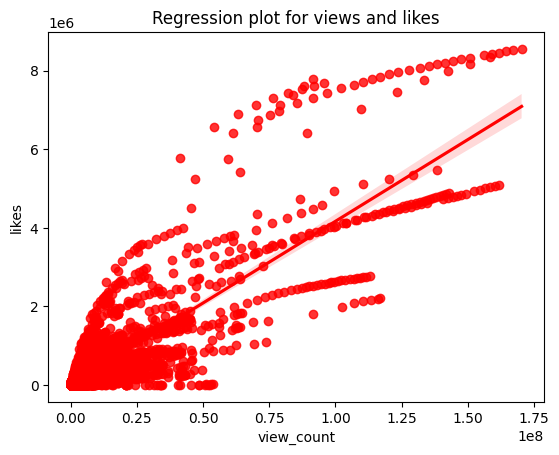

In [7]:
# Regression plot to see the relarionship between views and likes
sns.regplot(data=df, x='view_count', y='likes', color='Red')
plt.title('Regression plot for views and likes')

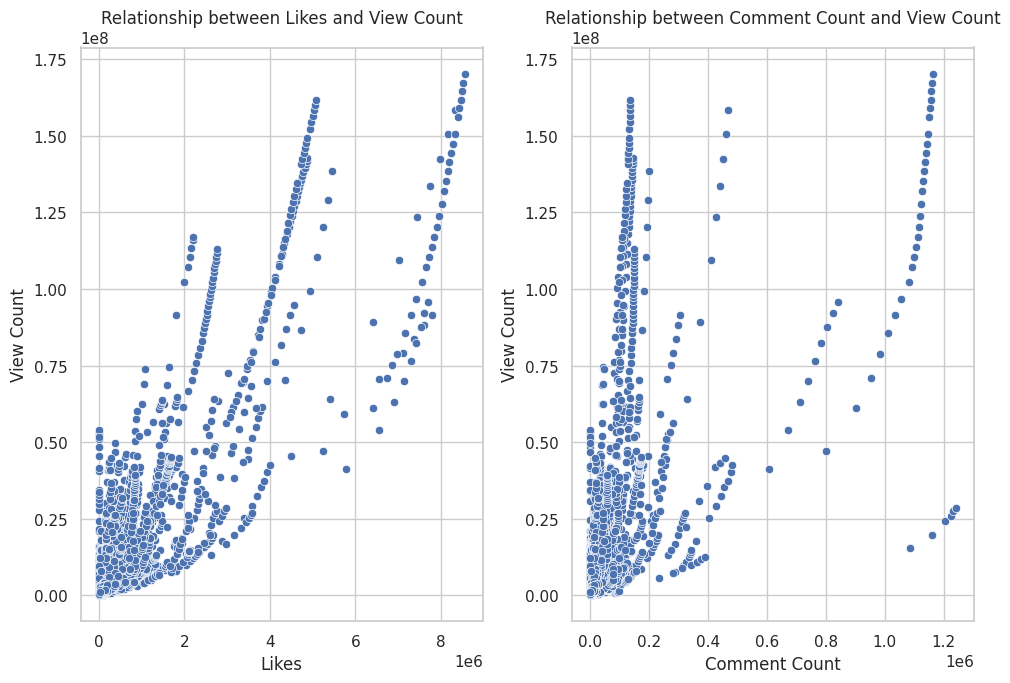

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure of given size
fig = plt.figure(figsize=(10, 7))


# Subplot 1: Relationship between likes and view_count
ax2 = fig.add_subplot(121)
sns.scatterplot(x=df['likes'], y=df['view_count'], ax=ax2)
ax2.set_title('Relationship between Likes and View Count')
ax2.set_xlabel('Likes')
ax2.set_ylabel('View Count')

# Subplot 2: Relationship between comment_count and view_count
ax3 = fig.add_subplot(122)
sns.scatterplot(x=df['comment_count'], y=df['view_count'], ax=ax3)
ax3.set_title('Relationship between Comment Count and View Count')
ax3.set_xlabel('Comment Count')
ax3.set_ylabel('View Count')

# Adjust layout
plt.tight_layout()

plt.show()

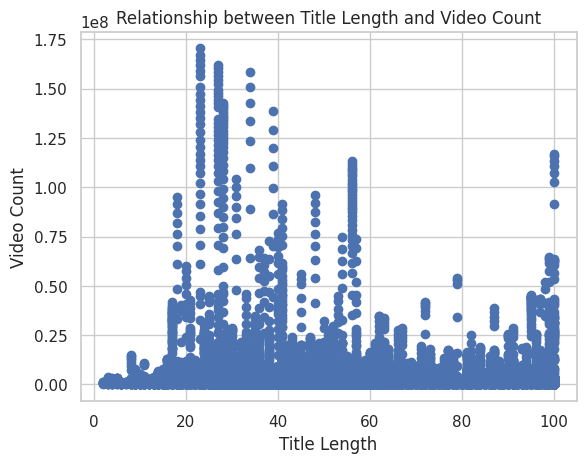

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df['title'].str.len(), df['view_count'])
plt.xlabel('Title Length')
plt.ylabel('Video Count')
plt.title('Relationship between Title Length and Video Count')
plt.show()

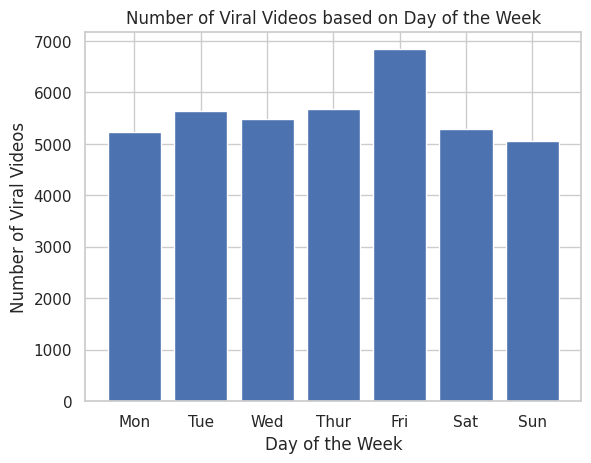

In [10]:
# Convert the "publishedAt" column to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract the day of the week (Monday=0, Sunday=6)
df['day_of_week'] = df['publishedAt'].dt.dayofweek

# Count the number of viral videos per day
viral_counts = df['day_of_week'].value_counts().sort_index()

# Create a bar plot to visualize the data
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
plt.bar(viral_counts.index, viral_counts.values)
plt.xticks(viral_counts.index, days)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Viral Videos')
plt.title('Number of Viral Videos based on Day of the Week')
plt.show()

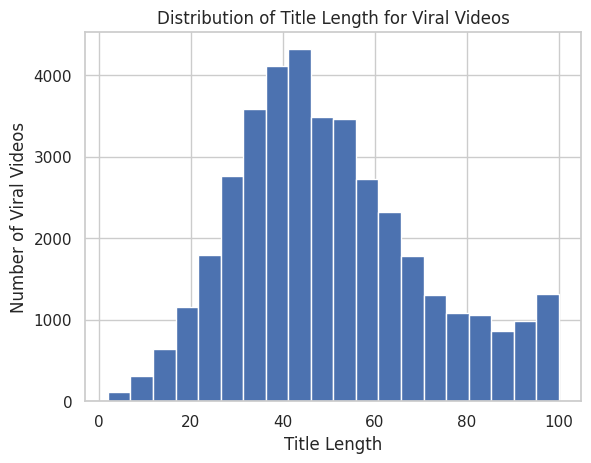

In [11]:
df['title_length'] = df['title'].str.len()

# Filter viral videos
viral_videos = df['title_length']

# Create a histogram
plt.hist(viral_videos, bins=20)
plt.xlabel('Title Length')
plt.ylabel('Number of Viral Videos')
plt.title('Distribution of Title Length for Viral Videos')
plt.show()

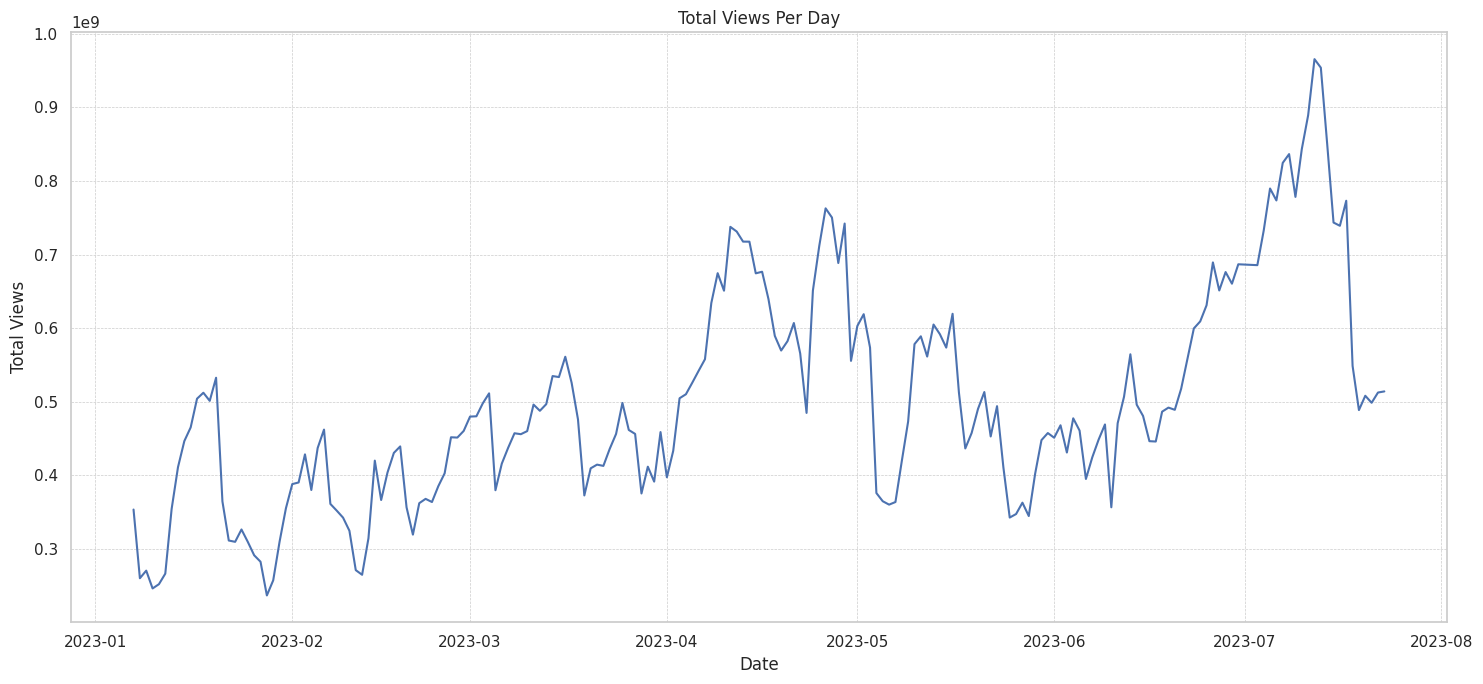

In [12]:
# Convert the 'trending_date' column to datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'])

# Group by 'trending_date' and sum the 'view_count'
views_per_day = df.groupby('trending_date')['view_count'].sum().reset_index()

# Plotting the time series of daily views
plt.figure(figsize=(15, 7))
sns.lineplot(data=views_per_day, x='trending_date', y='view_count')
plt.title('Total Views Per Day')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

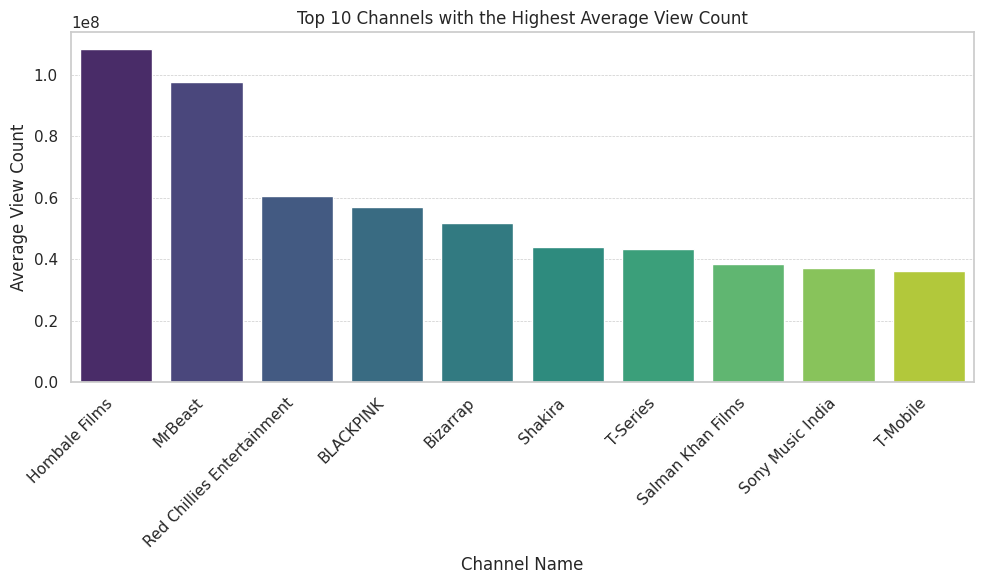

In [13]:
# Grouping by 'Channel Title' to get the average view count for each channel
average_views_per_channel = df.groupby('channelTitle')['view_count'].mean()

# Sorting the results to get channels with the highest average view count
top_channels_avg_views = average_views_per_channel.sort_values(ascending=False)


# Visualizing the top 10 channels with the highest average view count
plt.figure(figsize=(10, 6))
sns.barplot(x=top_channels_avg_views.head(10).index, y=top_channels_avg_views.head(10).values, palette="viridis")
plt.title('Top 10 Channels with the Highest Average View Count')
plt.xlabel('Channel Name')
plt.ylabel('Average View Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

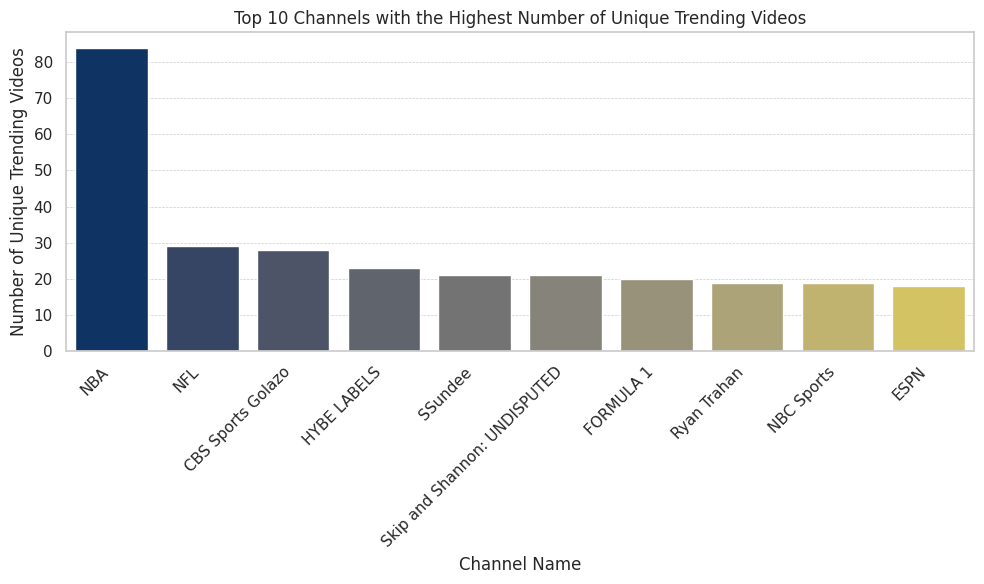

In [14]:
# Grouping by 'channelTitle' and 'video_id' to get unique video counts for each channel
unique_videos_per_channel = df.drop_duplicates(subset=['channelTitle', 'video_id']).groupby('channelTitle').size()

# Sorting the results to get channels with the highest number of unique trending videos
top_channels = unique_videos_per_channel.sort_values(ascending=False)

# Visualizing the top 10 channels with the highest number of unique trending videos
plt.figure(figsize=(10, 6))
sns.barplot(x=top_channels.head(10).index, y=top_channels.head(10).values, palette="cividis")
plt.title('Top 10 Channels with the Highest Number of Unique Trending Videos')
plt.xlabel('Channel Name')
plt.ylabel('Number of Unique Trending Videos')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

In [15]:
# Defining the category_map dictionary
category_map = {
    1: "Film & Animation", 2: "Autos & Vehicles", 10: "Music", 15: "Pets & Animals", 17: "Sports",
    18: "Short Movies", 19: "Travel & Events", 20: "Gaming", 21: "Videoblogging", 22: "People & Blogs",
    23: "Comedy", 24: "Entertainment", 25: "News & Politics", 26: "Howto & Style", 27: "Education",
    28: "Science & Technology", 29: "Nonprofits & Activism", 30: "Movies", 31: "Anime/Animation",
    32: "Action/Adventure", 33: "Classics", 34: "Comedy", 35: "Documentary", 36: "Drama", 37: "Family",
    38: "Foreign", 39: "Horror", 40: "Sci-Fi/Fantasy", 41: "Thriller", 42: "Shorts", 43: "Shows", 44: "Trailers"
}

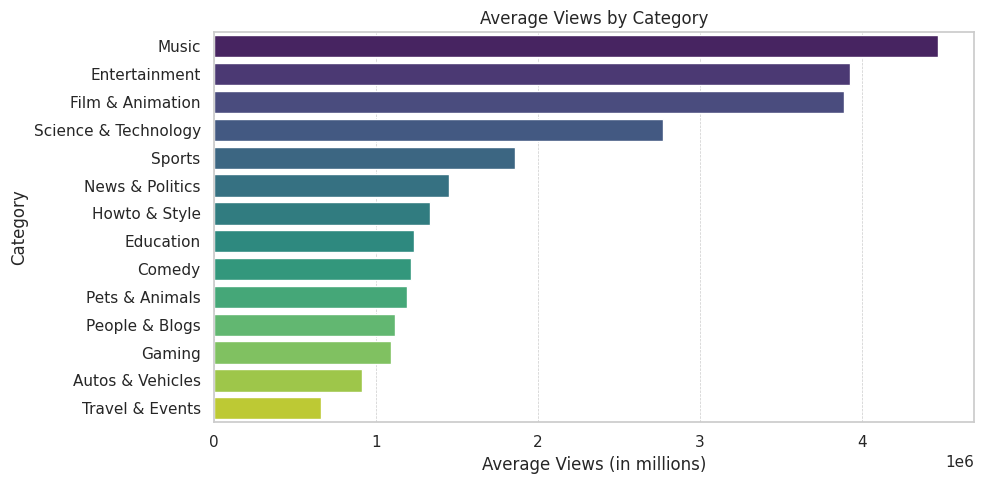

In [16]:
# Calculate average views for each category
df['category_name'] = df['categoryId'].map(category_map)
average_views_by_category = df.groupby('category_name')['view_count'].mean().reset_index().sort_values('view_count', ascending=False)

# Plotting average views by category
plt.figure(figsize=(10, 5))
sns.barplot(data=average_views_by_category, y='category_name', x='view_count', palette='viridis')
plt.title('Average Views by Category')
plt.xlabel('Average Views (in millions)')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

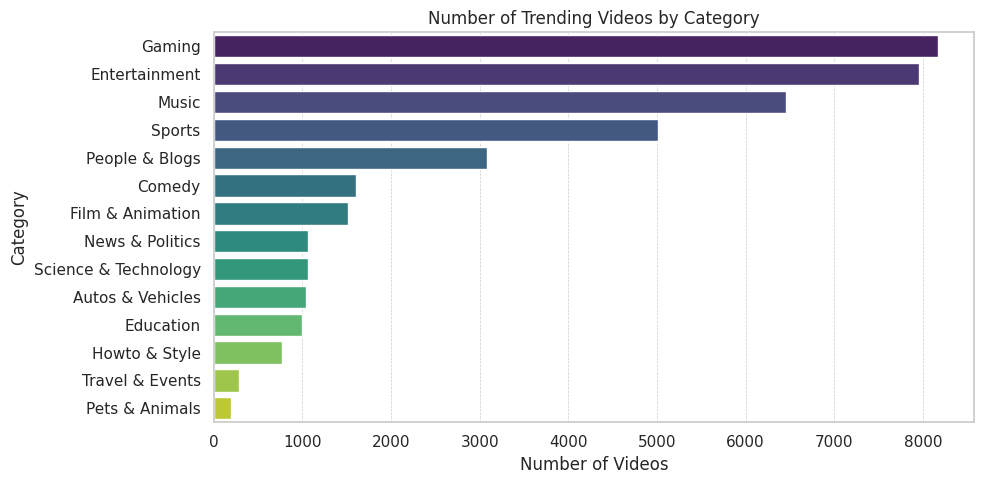

In [17]:
df['category_name'] = df['categoryId'].map(category_map)

# Count the number of trending videos for each category
category_counts = df.groupby('category_name').size().reset_index(name='video_count').sort_values('video_count', ascending=False)

# Plotting the most popular categories
plt.figure(figsize=(10, 5))
sns.barplot(data=category_counts, y='category_name', x='video_count', palette='viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

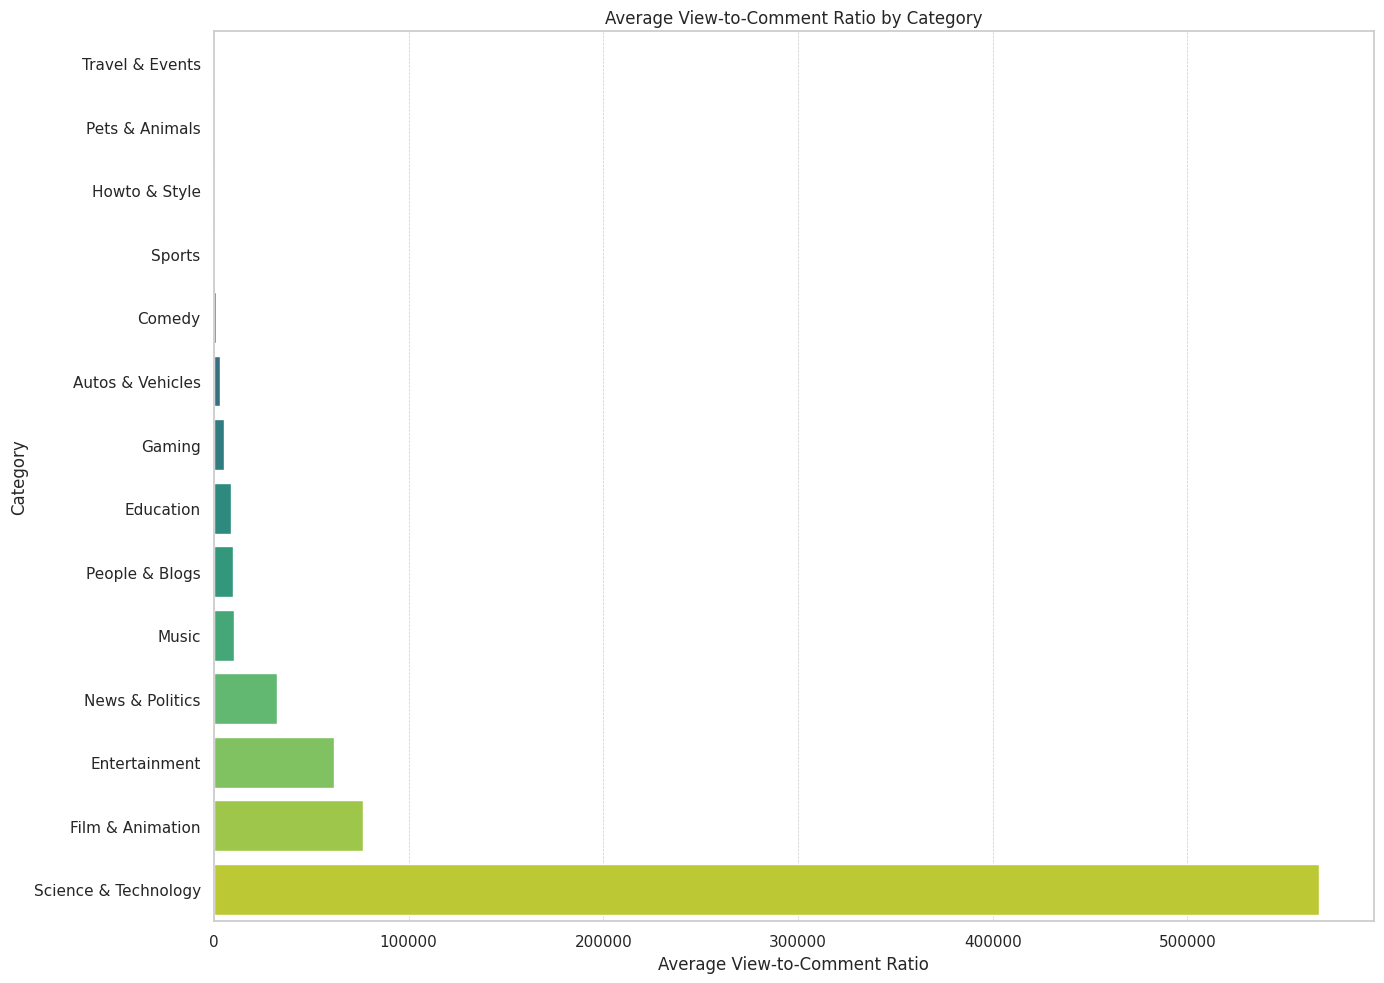

In [18]:
# Calculate the View-to-Comment ratio
df['view_to_comment_ratio'] = df['view_count'] / df['comment_count'].replace(0, 1)  # Replace 0 with 1 to avoid division by zero

# Calculate the average View-to-Comment ratio for each category
average_view_comment_by_category = df.groupby('category_name')['view_to_comment_ratio'].mean().reset_index().sort_values('view_to_comment_ratio', ascending=True)

# Plotting the average View-to-Comment ratio by category
plt.figure(figsize=(14, 10))
sns.barplot(data=average_view_comment_by_category, y='category_name', x='view_to_comment_ratio', palette='viridis')
plt.title('Average View-to-Comment Ratio by Category')
plt.xlabel('Average View-to-Comment Ratio')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Word Cloud for Description

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-19-b29ff5c74c57>:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-19-b29ff5c74c57>:16: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


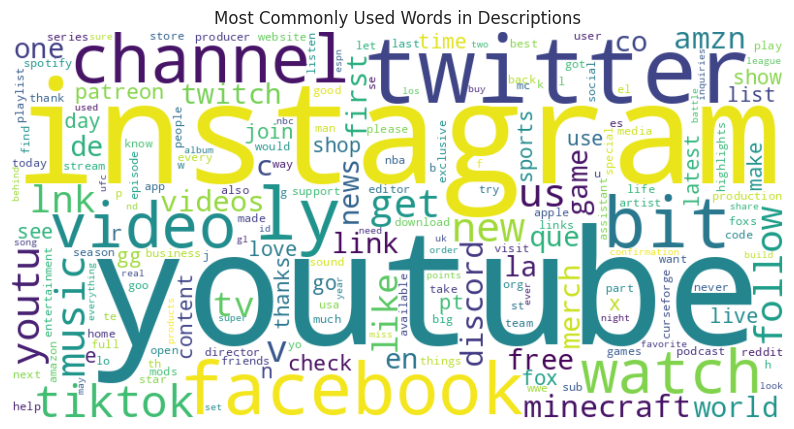

In [19]:
import re, nltk #importing regular expressions & natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

from collections import Counter
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# Preprocess the descriptions
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    return text

df['description'] = df['description'].apply(preprocess_text)

# Tokenize the descriptions
df['tokens'] = df['description'].apply(lambda x: x.split())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Remove specific words
specific_words = ['https', 'http', 'www', 'com', 'subscribe', 'official']
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in specific_words])

# Count word frequencies
word_freq = Counter([word for tokens in df['tokens'] for word in tokens])

# Remove specific words or symbols
specific_words = ['#']
for word in specific_words:
    del word_freq[word]

# Sort word frequencies in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Visualize the most commonly used words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Commonly Used Words in Descriptions')
plt.show()

Word Cloud for Titles

<ipython-input-20-7b80ae34c1fa>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


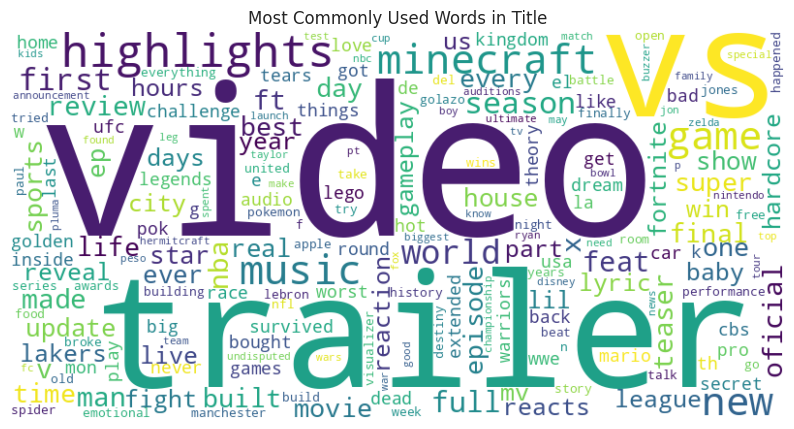

In [20]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# Preprocess the descriptions
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    return text

df['title'] = df['title'].apply(preprocess_text)

# Tokenize the descriptions
df['tokens'] = df['title'].apply(lambda x: x.split())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Remove specific words
specific_words = ['https', 'http', 'www', 'com', 'subscribe', 'official']
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in specific_words])

# Count word frequencies
word_freq = Counter([word for tokens in df['tokens'] for word in tokens])

# Remove specific words or symbols
specific_words = ['#']
for word in specific_words:
    del word_freq[word]

# Sort word frequencies in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Visualize the most commonly used words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Commonly Used Words in Title')
plt.show()

Time and Seasonality Based Analysis

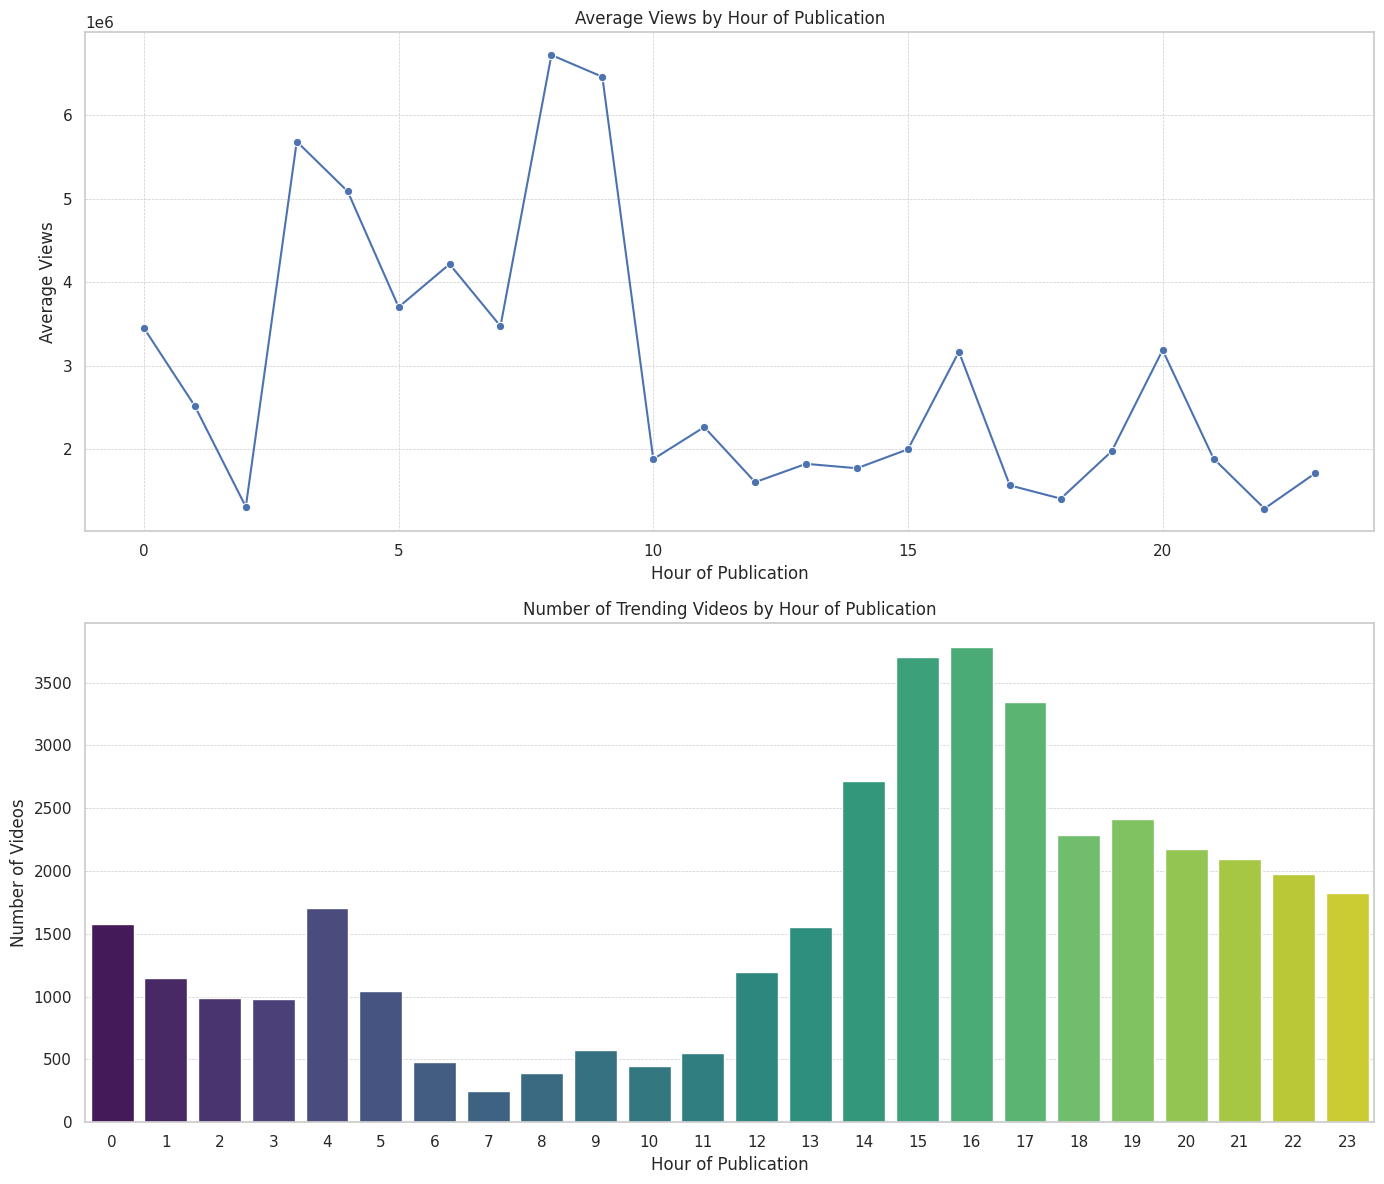

In [21]:
# Extract hour and month from 'publishedAt' for the analysis
df['publish_hour'] = df['publishedAt'].dt.hour
df['publish_month'] = df['publishedAt'].dt.month_name()

# Average views by hour of publication
average_views_by_hour = df.groupby('publish_hour')['view_count'].mean().reset_index()

# Number of videos that trended by hour of publication
videos_by_hour = df.groupby('publish_hour').size().reset_index(name='video_count')

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

sns.lineplot(data=average_views_by_hour, x='publish_hour', y='view_count', ax=ax1, marker='o')
ax1.set_title('Average Views by Hour of Publication')
ax1.set_xlabel('Hour of Publication')
ax1.set_ylabel('Average Views')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

sns.barplot(data=videos_by_hour, x='publish_hour', y='video_count', ax=ax2, palette='viridis')
ax2.set_title('Number of Trending Videos by Hour of Publication')
ax2.set_xlabel('Hour of Publication')
ax2.set_ylabel('Number of Videos')
ax2.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Day of week analysis

In [22]:
# Extracting the day of the week from the trending_date column
df['day_of_week'] = df['trending_date'].dt.day_name()

# Grouping by day of the week and aggregating the sum of views, likes, dislikes, and comment count
weekly_aggregated = df.groupby('day_of_week').agg({
    'view_count': 'sum',
    'likes': 'sum',
    'comment_count': 'sum'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Reindexing to maintain week order

weekly_aggregated

,view_count,likes,comment_count
day_of_week,,,
Monday,14027377435,606425804,42151167
Tuesday,14269343079,601436347,43030034
Wednesday,14322581031,598540122,43207474
Thursday,14053953866,597145376,43060670
Friday,14280858654,605219094,43228795
Saturday,13606789529,601245991,44286354
Sunday,13222143231,577094544,41331639


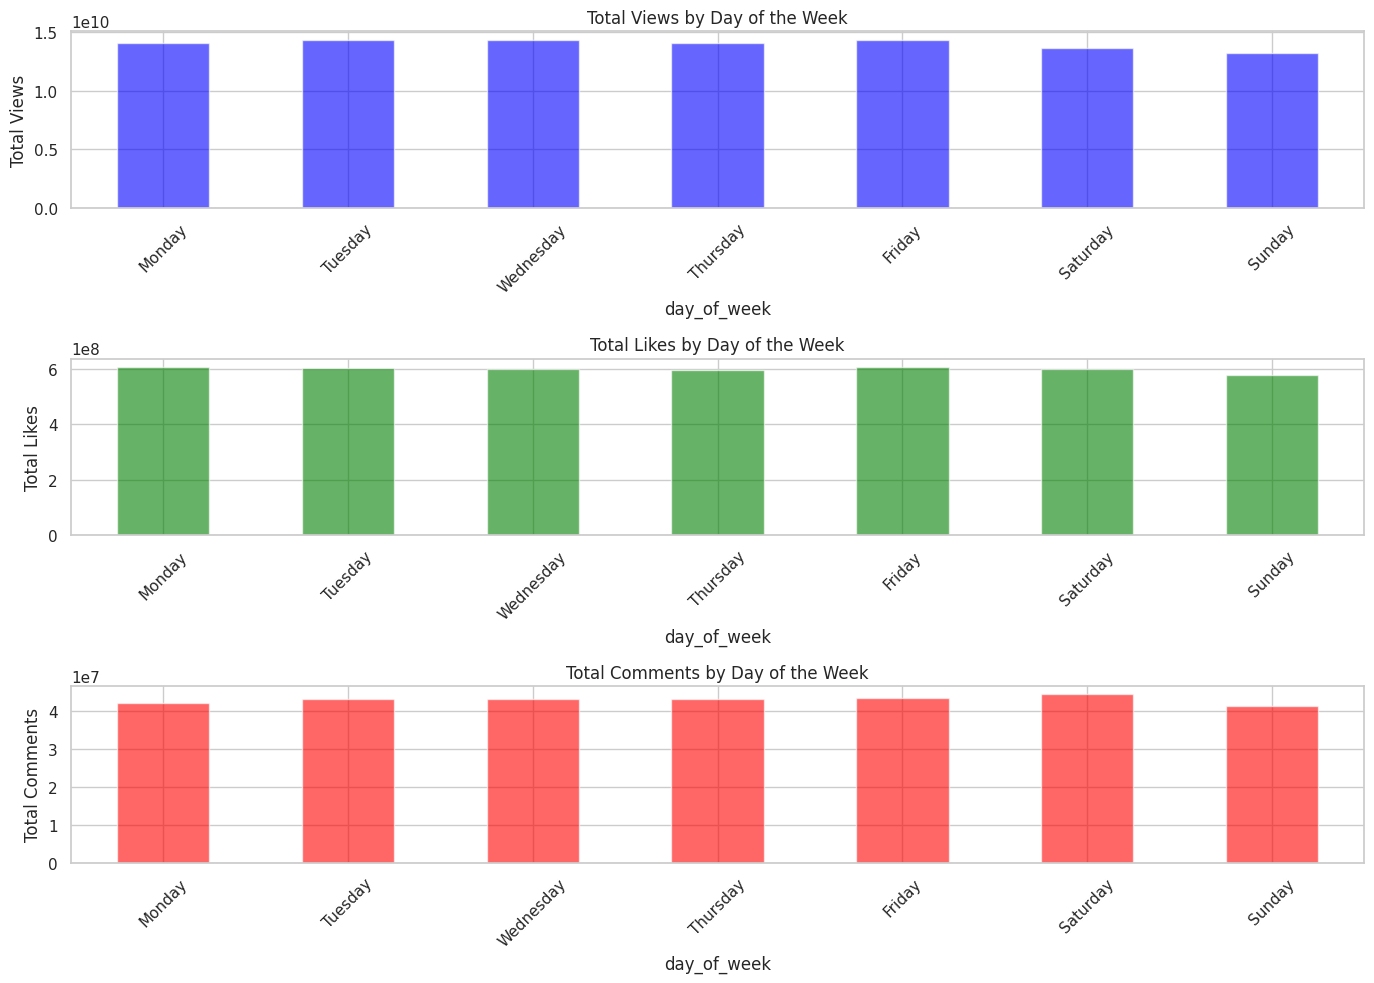

In [23]:
import matplotlib.pyplot as plt

# Plotting the aggregated metrics by day of the week
plt.figure(figsize=(14, 10))

# Views plot
plt.subplot(3, 1, 1)
weekly_aggregated['view_count'].plot(kind='bar', color='blue', alpha=0.6)
plt.title('Total Views by Day of the Week')
plt.ylabel('Total Views')
plt.xticks(rotation=45)

# Likes plot
plt.subplot(3, 1, 2)
weekly_aggregated['likes'].plot(kind='bar', color='green', alpha=0.6)
plt.title('Total Likes by Day of the Week')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)

# Comment count plot
plt.subplot(3, 1, 3)
weekly_aggregated['comment_count'].plot(kind='bar', color='red', alpha=0.6)
plt.title('Total Comments by Day of the Week')
plt.ylabel('Total Comments')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

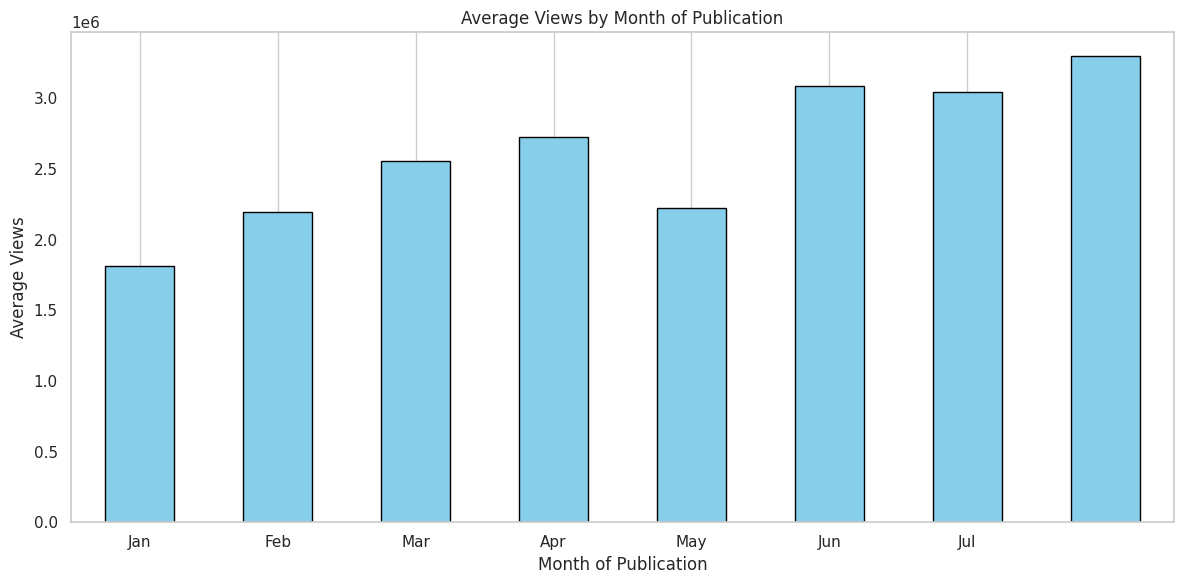

In [24]:
# Convert 'publishedAt' to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract month from 'publishedAt'
df['publish_month'] = df['publishedAt'].dt.month

# Calculate average views based on the month of publication
avg_views_by_month = df.groupby('publish_month')['view_count'].mean()

# Plotting the average views by month
plt.figure(figsize=(12, 6))
avg_views_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Views by Month of Publication')
plt.xlabel('Month of Publication')
plt.ylabel('Average Views')
plt.xticks(ticks=range(7), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

July is not considered as the dataset contains data only till 18th July 2023 so the graph may be skewed

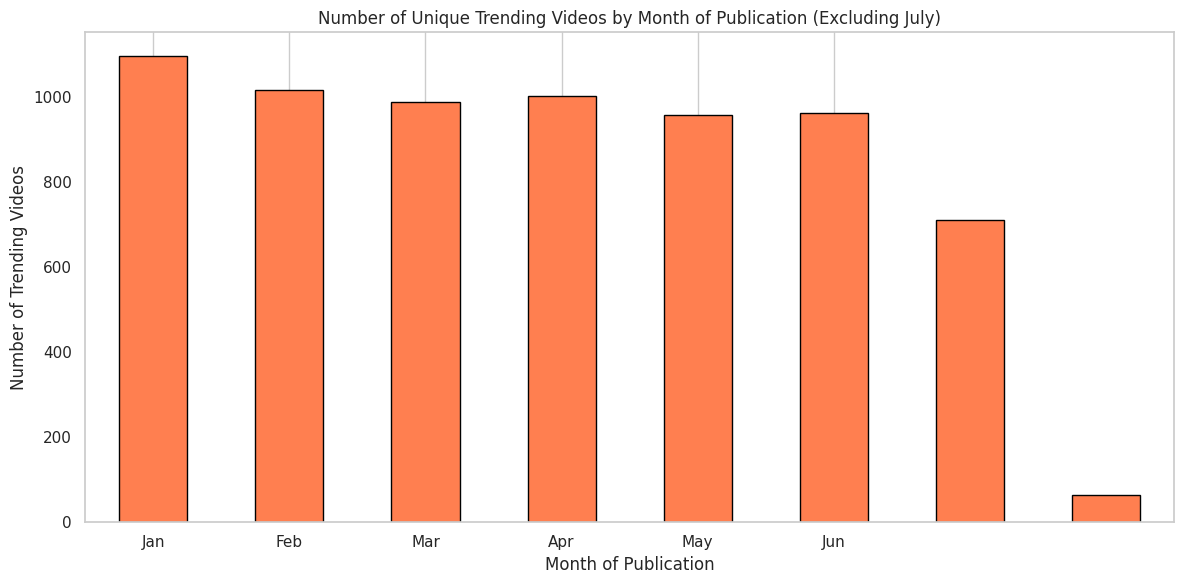

In [25]:
# Counting unique trending videos by month of publication using the correct column name for video ID
trending_videos_by_month = df.groupby('publish_month')['video_id'].nunique()

# Plotting the number of unique trending videos by month
plt.figure(figsize=(12, 6))
trending_videos_by_month.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Number of Unique Trending Videos by Month of Publication (Excluding July)')
plt.xlabel('Month of Publication')
plt.ylabel('Number of Trending Videos')
plt.xticks(ticks=range(6), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

July is not considered as the dataset contains data only till 18th July 2023 so the graph may be skewed

In [26]:
# Convert 'publishedAt' column to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract the day from 'publishedAt'
df['publish_day_of_week'] = df['publishedAt'].dt.day_name()

# For each video, calculate the number of days it stayed on the trending list
duration_on_trending =df.groupby('video_id').agg({
    'trending_date': ['min', 'max'],
    'publish_day_of_week': 'first'
}).reset_index()
duration_on_trending.columns = ['video_id', 'first_trending_date', 'last_trending_date', 'publish_day_of_week']

# Calculate the duration (in days) for each video
duration_on_trending['trending_duration'] = (duration_on_trending['last_trending_date'] -
                                            duration_on_trending['first_trending_date']).dt.days + 1

# Display the first few rows
duration_on_trending.head()

,video_id,first_trending_date,last_trending_date,publish_day_of_week,trending_duration
0,#NAME?,2023-01-08 00:00:00+00:00,2023-07-23 00:00:00+00:00,Thursday,197
1,-05ql6KbOJU,2023-04-22 00:00:00+00:00,2023-04-28 00:00:00+00:00,Friday,7
2,-0YWQULsQcE,2023-07-03 00:00:00+00:00,2023-07-07 00:00:00+00:00,Saturday,5
3,-0i3KxaENNo,2023-03-21 00:00:00+00:00,2023-03-27 00:00:00+00:00,Monday,7
4,-1It5Z7dfMY,2023-01-08 00:00:00+00:00,2023-01-13 00:00:00+00:00,Saturday,6


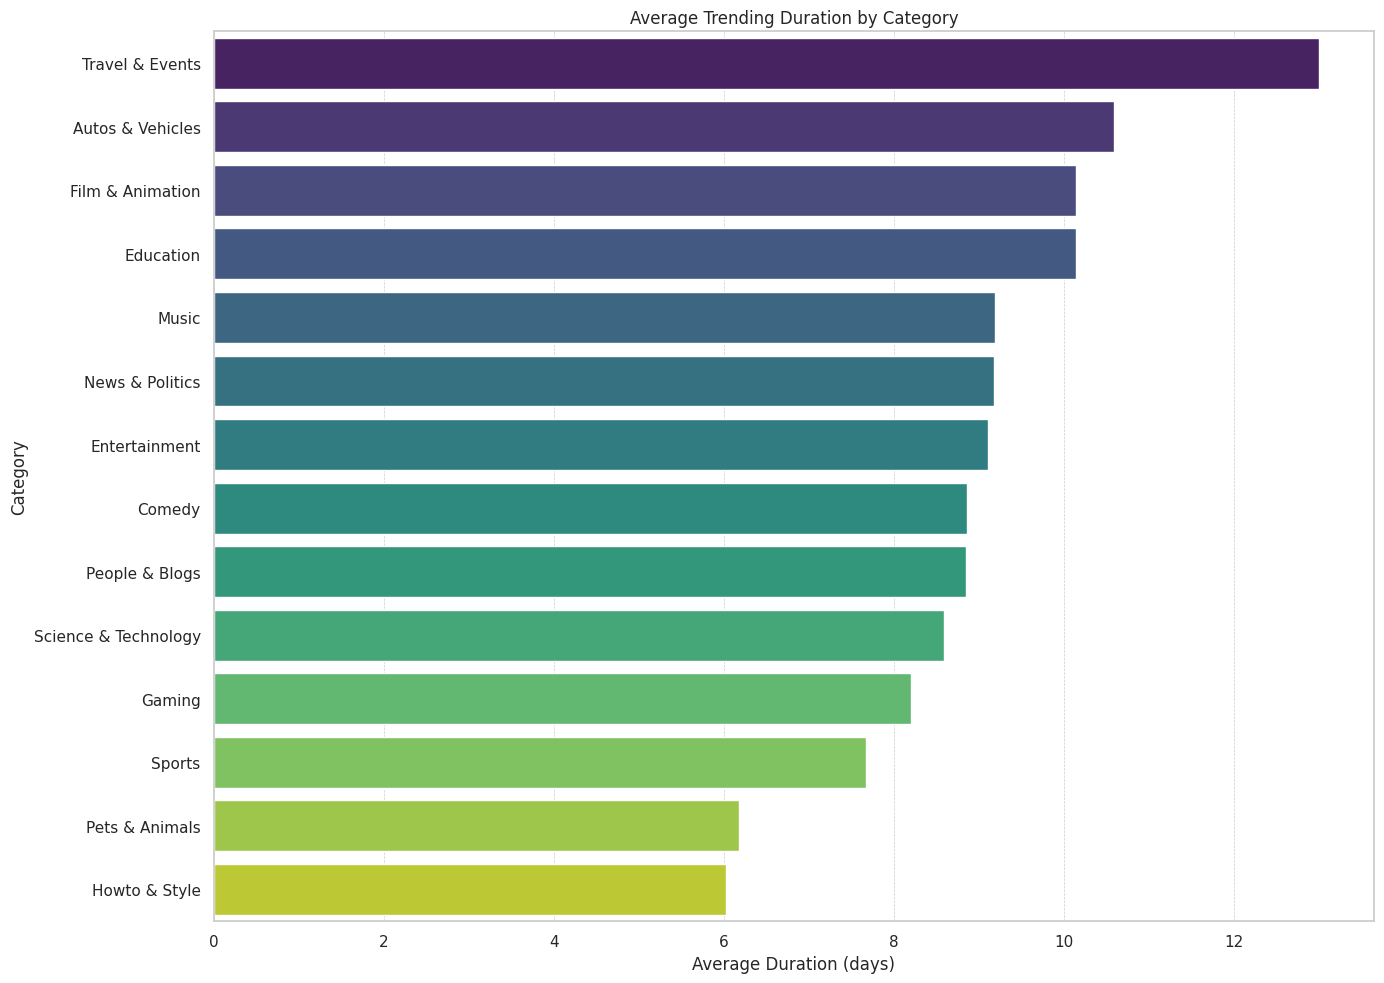

In [27]:
# Calculate the average trending duration for each category using the previously computed 'duration_on_trending' dataframe
average_duration_by_category = duration_on_trending.merge(df[['video_id', 'category_name']], on='video_id', how='left')
average_duration_by_category = average_duration_by_category.groupby('category_name')['trending_duration'].mean().reset_index().sort_values('trending_duration', ascending=False)

# Plotting average trending duration by category
plt.figure(figsize=(14, 10))
sns.barplot(data=average_duration_by_category, y='category_name', x='trending_duration', palette='viridis')
plt.title('Average Trending Duration by Category')
plt.xlabel('Average Duration (days)')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()